# Pairwise Significance Annotations

Pairwise significance annotations with:

- [ggpubr / `stat_compare_means()`](https://rpkgs.datanovia.com/ggpubr/reference/stat_compare_means.html)
- [ggsignif](https://const-ae.github.io/ggsignif)
- [ggprism / `add_pvalue()`](https://csdaw.github.io/ggprism/reference/add_pvalue.html)

In [1]:
install.packages('ggpubr')
install.packages('ggsignif')
install.packages('ggprism')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(ggplot2)
library(ggpubr)
library(ggsignif)
library(ggprism)

In [3]:
head(mpg, 3)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact


In [4]:
p <- ggplot(mpg, aes(drv, hwy)) + geom_boxplot()
comparisons <- list(c("4", "f"), c("4", "r"), c("f", "r"))

## ggpubr

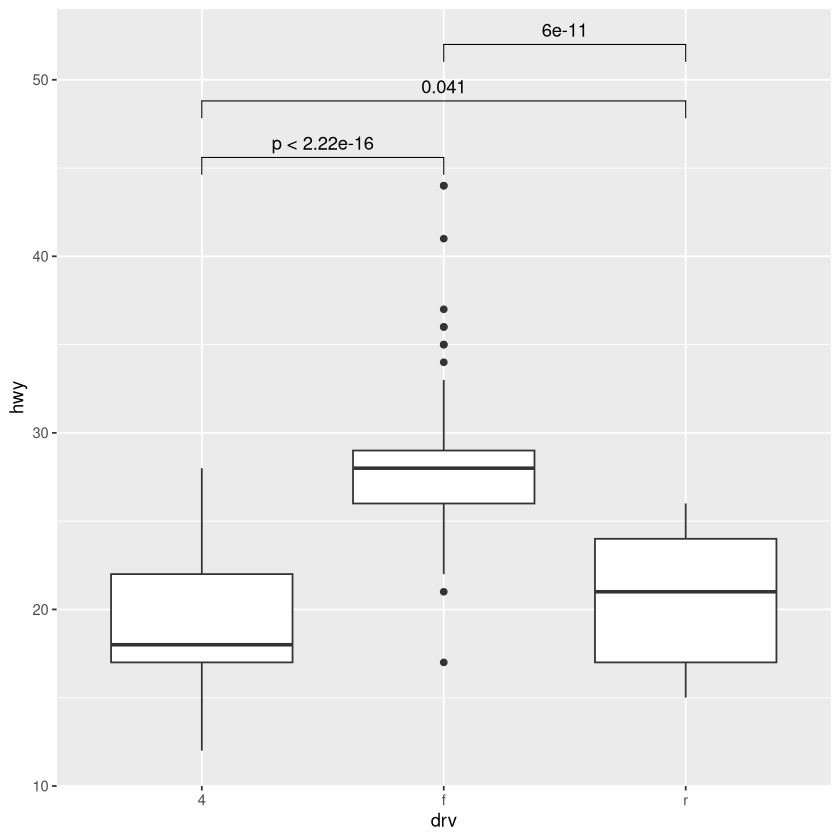

In [5]:
p +
    stat_compare_means(
        comparisons = comparisons,
        method = "wilcox.test",
        label = "p.format",
        step.increase = 0.1
    )

## ggsignif

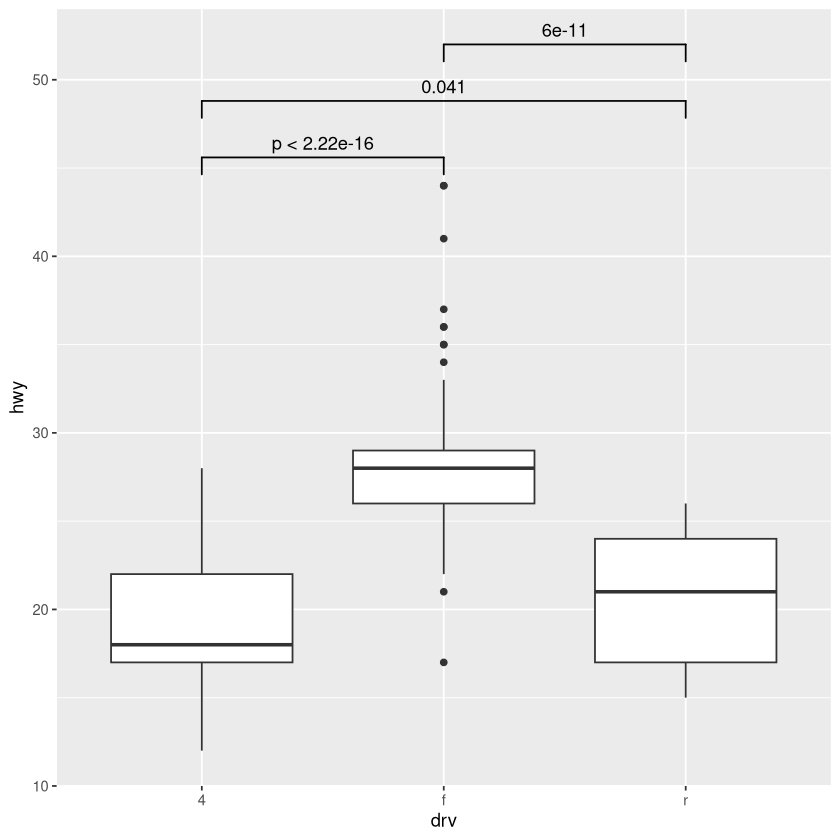

In [6]:
p +
    geom_signif(
        comparisons = comparisons,
        test = "wilcox.test",
        map_signif_level = FALSE,
        step_increase = 0.1
    )

## ggprism

In [7]:
# Dataset preparation

lvls <- levels(factor(mpg$drv))
pairs <- combn(lvls, 2, simplify = FALSE)

get_p <- function(g1, g2) {
  wilcox.test(mpg$hwy[mpg$drv == g1],
              mpg$hwy[mpg$drv == g2])$p.value
}

df_p <- do.call(rbind, lapply(seq_along(pairs), function(i) {
  g1 <- pairs[[i]][1]; g2 <- pairs[[i]][2]
  data.frame(group1 = g1, group2 = g2, p = get_p(g1, g2))
}))

base <- max(mpg$hwy, na.rm = TRUE) + 1
df_p$y.position <- base + seq_len(nrow(df_p)) * 4
df_p$label <- paste0("p = ", signif(df_p$p, 3))

df_p

group1,group2,p,y.position,label
<chr>,<chr>,<dbl>,<dbl>,<chr>
4,f,9.041090e-28,49,p = 9.04e-28
4,r,4.104577e-02,53,p = 0.041
f,r,5.955333e-11,57,p = 5.96e-11


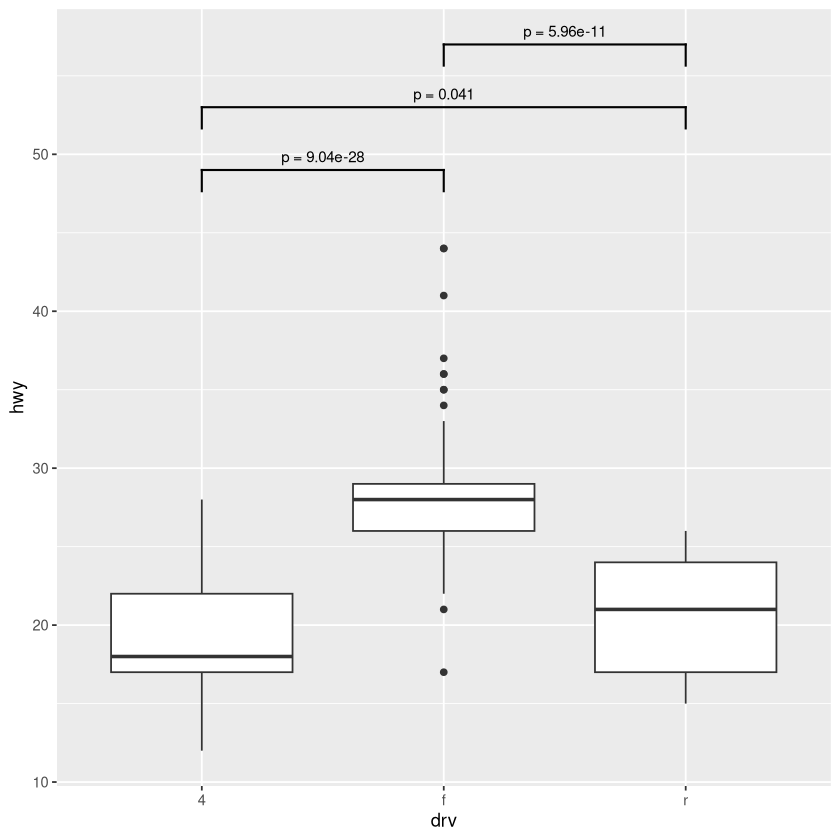

In [8]:
p +
    add_pvalue(
        df_p,
        xmin = "group1", xmax = "group2",
        y.position = "y.position",
        label = "label"
    )